In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import os
# from google.colab import files

import math

LOADING THE DATASET

In [ ]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling tmp/rock_paper_scissors/3.0.0.incompleteILADYW/rock_paper_scissors-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling tmp/rock_paper_scissors/3.0.0.incompleteILADYW/rock_paper_scissors-test.tfrecord*...:   0%|         …

Dataset rock_paper_scissors downloaded and prepared to tmp/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
print('train dataset:', dataset_train_raw)
print('train dataset size:', len(list(dataset_train_raw)), '\n')

print('test dataset:', dataset_test_raw)
print('test dataset size:', len(list(dataset_test_raw)), '\n')

train dataset: <PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
train dataset size: 2520 

test dataset: <PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>
test dataset size: 372 



In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path=PosixGPath('/tmp/tmp3pfuupgjtfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

SPLITTING THE DATASET INTO TRAIN AND TEST IMAGES

In [ ]:
NUMBER_OF_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUMBER_OF_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUMBER_OF_CLASSES = dataset_info.features['label'].num_classes

In [ ]:
print('Number of TRAIN examples:', NUMBER_OF_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUMBER_OF_TEST_EXAMPLES)
print('Number of label classes:', NUMBER_OF_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [ ]:
INPUT_IMG_SIZE_ORIGINAL = dataset_info.features['image'].shape[0]
INPUT_IMG_SHAPE_ORIGINAL = dataset_info.features['image'].shape

In [ ]:
print(INPUT_IMG_SIZE_ORIGINAL)
print(INPUT_IMG_SHAPE_ORIGINAL)

300
(300, 300, 3)


In [ ]:
INPUT_IMG_SIZE_REDUCED = INPUT_IMG_SIZE_ORIGINAL // 2
INPUT_IMG_SHAPE_REDUCED = (
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SIZE_REDUCED,
    INPUT_IMG_SHAPE_ORIGINAL[2]
)

In [ ]:
INPUT_IMG_SIZE = INPUT_IMG_SIZE_REDUCED
INPUT_IMG_SHAPE = INPUT_IMG_SHAPE_REDUCED

In [ ]:
print(INPUT_IMG_SHAPE)

(150, 150, 3)


In [ ]:
print(INPUT_IMG_SIZE)

150


In [ ]:
get_label_name = dataset_info.features['label'].int2str

In [ ]:
print(get_label_name(0))
print(get_label_name(1))
print(get_label_name(2))

rock
paper
scissors


DEFINING A FUNCTION TO DISPLAY SOME IMAGES

In [ ]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

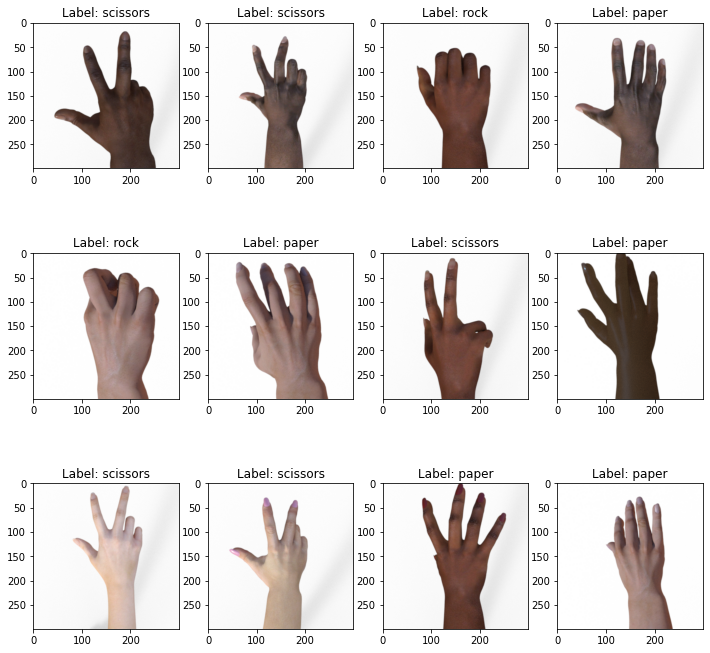

In [ ]:
preview_dataset(dataset_train_raw)

NORMALIZING THE IMAGE

In [ ]:
def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [ ]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [ ]:
(first_image, first_label) = list(dataset_train.take(1))[0]
print('Label:', first_label.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (150, 150, 3) 

[[[0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.995098   0.995098   0.995098  ]
  [0.995098   0.995098   0.995098  ]
  ...
  [0.98333335 0.98333335 0.98333335]
  [0.9813726  0.9813726  0.9813726 ]
  [0.98333335 0.98333335 0.98333335]]

 [[0.99607843 0.99607843 0.99607843]
  [0.9941176  0.9941176  0.9941176 ]
  [0.9941176  0.9941176  0.9941176 ]
  ...
  [0.9852941  0.9852941  0.9852941 ]
  [0.9852941  0.9852941  0.9852941 ]
  [0.9813726  0.9813726  0.9813726 ]]

 ...

 [[0.9862745  0.9862745  0.9862745 ]
  [0.98725486 0.98725486 0.98725486]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.9705882  0.9705882  0.9705882 ]
  [0.97352946 0.97352946 0.97352946]
  [0.9754902  0.9754902  0.9754902 ]]

 [[0.9882353  0.9882353  0.9882353

**DATA AUGMENTATION**

To fight the model overfitting and to generalize the model to a broader set of examples we can try to augment the training data.

[Tensorflow data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)

[Simple Tensorflow data augmentation](https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/)

FLIPPING THE IMAGES
(HORIZONTAL FLIP OR VERTICAL FLIP)

In [ ]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

CHANGING THE SATURATION AND BRIGHTNESS OF IMAGE TO OVERCOME ANY BRIGHTNESS OR BACKGROUND COLOUR CHANGE ISSUES

In [ ]:
def augment_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_hue(image, max_delta=0.08)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image

APPLYING ROTATION ON IMAGES TO RANDOMLY ROTATE THE IMAGES

In [ ]:
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

APPLYING INVERSION ON RANDOM IMAGES

In [ ]:
def augment_inversion(image: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    return image

ZOOMING IMAGES TO GET A BETTER TRAINING IMAGES

In [ ]:
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

DEFINING A FUNCTION TO PERFORM ABOVE AUGMENTATIONS

In [ ]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_color(image)
    image = augment_rotation(image)
    image = augment_zoom(image)
    image = augment_inversion(image)
    return image, label

APPLYING ABOVE AUGMENTATIONS TO THE TRAIN IMAGES

In [ ]:
dataset_train_augmented = dataset_train.map(augment_data)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


DISPLAYING SOME OF RANDOM TRAINING IMAGES

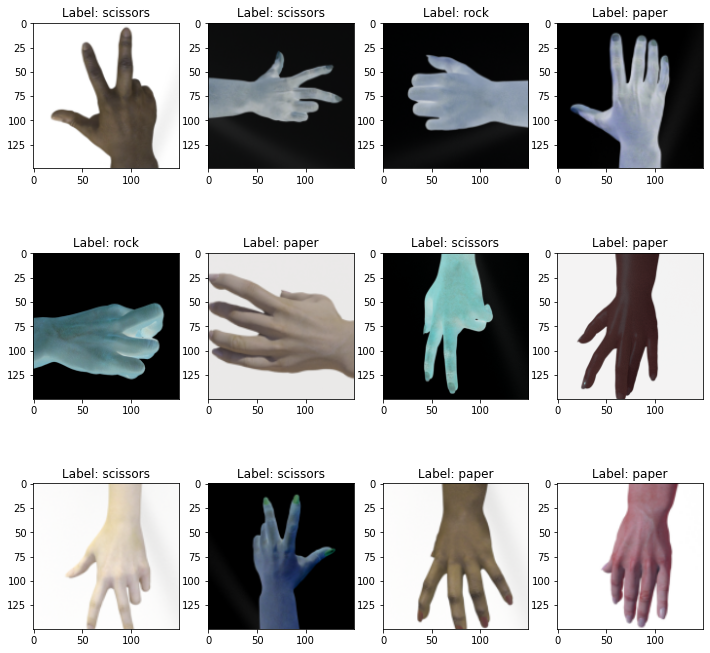

In [ ]:
preview_dataset(dataset_train_augmented)

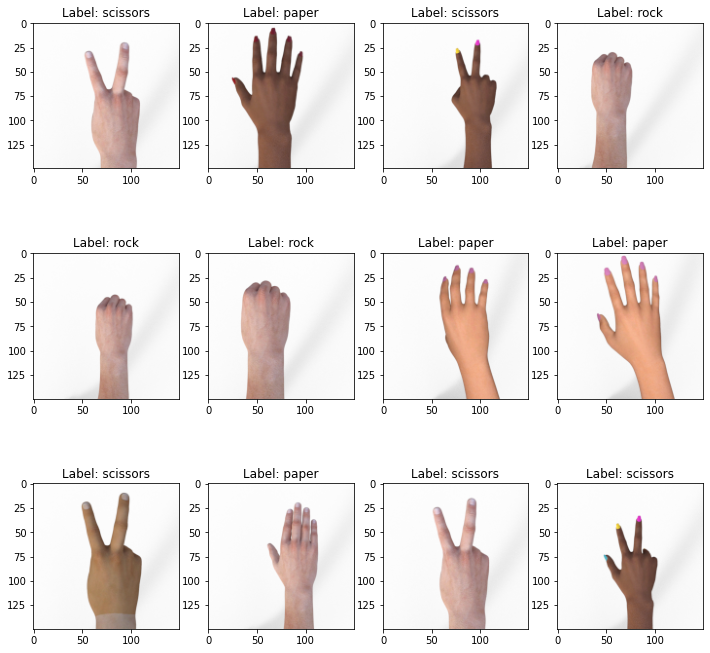

In [ ]:
preview_dataset(dataset_test)

In [ ]:
dataset_test

<MapDataset element_spec=(TensorSpec(shape=(150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
BATCH_SIZE = 32

SHUFFLING THE TRAIN DATASET AND CREATING BATCHES

In [ ]:
dataset_train_augmented_shuffled = dataset_train_augmented.shuffle(buffer_size=NUMBER_OF_TRAIN_EXAMPLES)

dataset_train_augmented_shuffled = dataset_train_augmented.batch(batch_size=BATCH_SIZE)

dataset_train_augmented_shuffled = dataset_train_augmented_shuffled.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [ ]:
print(dataset_train_augmented_shuffled)
print(dataset_test_shuffled)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


CONVERSION OF BATCHES INTO NUMPY ARRAYS

Label batch shape: (32,) 

Image batch shape: (32, 150, 150, 3) 

Label batch: [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 2 2 0 0] 

First batch image: [[[0.90969473 0.9059827  0.90651506]
  [0.90722287 0.90351087 0.90404326]
  [0.90557504 0.901863   0.90239537]
  ...
  [0.91381437 0.91010237 0.91063476]
  [0.91381437 0.91010237 0.91063476]
  [0.9129904  0.9092784  0.9098108 ]]

 [[0.90557504 0.901863   0.90239537]
  [0.9063989  0.9026869  0.9032193 ]
  [0.9063989  0.9026869  0.9032193 ]
  ...
  [0.9121665  0.9084544  0.9089868 ]
  [0.9129904  0.9092784  0.9098108 ]
  [0.9129904  0.9092784  0.9098108 ]]

 [[0.90722287 0.90351087 0.90404326]
  [0.90557504 0.901863   0.90239537]
  [0.90722287 0.90351087 0.90404326]
  ...
  [0.9121665  0.9084544  0.9089868 ]
  [0.9129904  0.9092784  0.9098108 ]
  [0.9129904  0.9092784  0.9098108 ]]

 ...

 [[0.8948639  0.8911519  0.8916843 ]
  [0.8899203  0.88620824 0.8867406 ]
  [0.89239204 0.88868    0.8892124 ]
  ...
  [0.90475106 0.90103

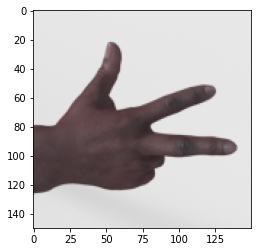

In [ ]:
batches = tfds.as_numpy(dataset_train_augmented_shuffled)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')

    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        break
    break

CREATING A MODEL TO TRAIN

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(input_shape=INPUT_IMG_SHAPE,filters=64,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(filters=64,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Convolution2D(filters=128,kernel_size=3,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(units=512,activation=tf.keras.activations.relu))

model.add(tf.keras.layers.Dense(units=3,activation=tf.keras.activations.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
steps_per_epoch = NUMBER_OF_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUMBER_OF_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [ ]:
training_history = model.fit(
    x=dataset_train_augmented_shuffled.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=30,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/30
78/78 [==============================] - 29s 192ms/step - loss: 0.9766 - accuracy: 0.4884 - val_loss: 1.1028 - val_accuracy: 0.4460
Epoch 2/30
78/78 [==============================] - 13s 167ms/step - loss: 0.5235 - accuracy: 0.7966 - val_loss: 0.6404 - val_accuracy: 0.6307
Epoch 3/30
78/78 [==============================] - 14s 187ms/step - loss: 0.2967 - accuracy: 0.8887 - val_loss: 0.4897 - val_accuracy: 0.7443
Epoch 4/30
78/78 [==============================] - 14s 179ms/step - loss: 0.2360 - accuracy: 0.9216 - val_loss: 0.3782 - val_accuracy: 0.8693
Epoch 5/30
78/78 [==============================] - 14s 177ms/step - loss: 0.1982 - accuracy: 0.9341 - val_loss: 0.3728 - val_accuracy: 0.8580
Epoch 6/30
78/78 [==============================] - 14s 178ms/step - loss: 0.1372 - accuracy: 0.9542 - val_loss: 0.3308 - val_accuracy: 0.8864
Epoch 7/30
78/78 [==============================] - 15s 190ms/step - loss: 0.0980 - accuracy: 0.9634 - val_loss: 0.3115 - val_accuracy: 0.9460

PLOTTING THE TRAINING GRAPH

In [ ]:
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

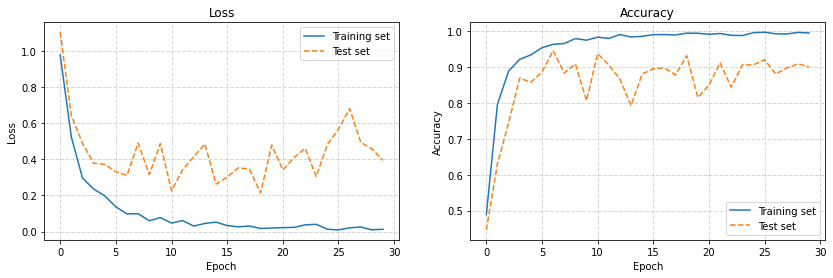

In [ ]:
render_training_history(training_history)

In [ ]:
loss,accuracy=model.evaluate(dataset_test_shuffled)
print("The loss is:",loss)
print("The Test accuracy is:",accuracy)

12/12 [==============================] - 1s 54ms/step - loss: 0.3901 - accuracy: 0.8978
The loss is: 0.3900626301765442
The Test accuracy is: 0.897849440574646


In [ ]:
prediction = model.predict(dataset_test_shuffled)
prediction

12/12 [==============================] - 1s 59ms/step


array([[2.5252337e-05, 5.3311288e-02, 9.4666344e-01],
       [4.2204353e-17, 9.9865216e-01, 1.3478653e-03],
       [2.9133510e-12, 2.7732814e-05, 9.9997222e-01],
       ...,
       [9.9789846e-01, 2.0973047e-03, 4.1390899e-06],
       [1.7942561e-08, 3.9527839e-01, 6.0472167e-01],
       [7.8989433e-07, 2.7266404e-02, 9.7273278e-01]], dtype=float32)

In [ ]:
pred_labels=tf.math.argmax(prediction,axis=1)
l=[]
for i in pred_labels:
  l.append(get_label_name(i))
print(l)

['scissors', 'paper', 'scissors', 'rock', 'rock', 'rock', 'paper', 'scissors', 'scissors', 'paper', 'scissors', 'scissors', 'rock', 'rock', 'rock', 'scissors', 'scissors', 'scissors', 'rock', 'paper', 'paper', 'rock', 'paper', 'paper', 'scissors', 'scissors', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'rock', 'scissors', 'scissors', 'rock', 'rock', 'paper', 'rock', 'paper', 'paper', 'scissors', 'paper', 'scissors', 'paper', 'paper', 'scissors', 'scissors', 'paper', 'rock', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'scissors', 'paper', 'paper', 'scissors', 'paper', 'paper', 'paper', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'paper', 'paper', 'scissors', 'paper', 'rock', 'scissors', 'rock', 'scissors', 'paper', 'rock', 'paper', 'rock', 'rock', 'paper', 'rock', 'scissors', 'scissors', 'paper', 'scissors', 'rock', 'rock', 'paper', 'scissors', 'rock', 'scissors', 'scissors', 'paper', 'rock', 'rock', 'paper', 'paper', 'scissors', 'rock', 'scissors', 'rock', 'paper', 'rock

In [ ]:
def preview_dataset_test(dataset):
    plt.figure(figsize=(18, 18))
    plot_index = 0
    i=0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        label = "actual="+get_label_name(label.numpy())+"::predicted="+l[i]
        i=i+1
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

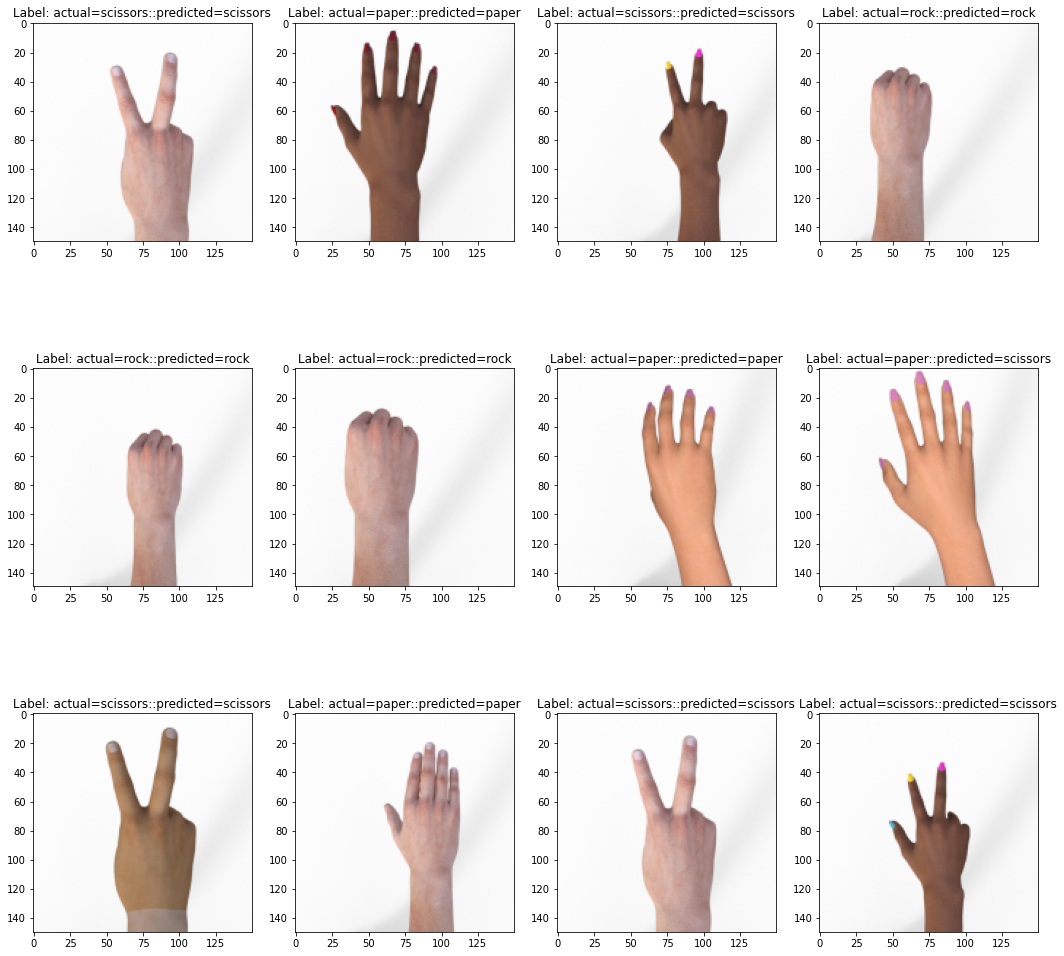

In [ ]:
preview_dataset_test(dataset_test)